# Introduction
Elliptical envelope, while effective has limitations. It limited to uni-modal and continuous data. Meaning, it struggles with data that isn't neatly distributed around a single peak (uni0modal) or with categorical data.

Isolation forest is a powerful alternative for outlier detection, addressing some of these shortcomings. It can work with multi-modal data, and accomodates for both, numerical and categorical features within the data.

### Intuition behind isolation forest
Isolation forest leverages the idea that outliers are inherently easier to isolate from the rest of the data. Their behavior deviates significantly from the "normal" patterns.

Traditional decision trees use features and target variables to make predictions,
- They split the data based on features (e.g. $x_2$) and thresholds to create a tree structure.
- This process continues until a certain depth or a specific impurity measure (e.g. Gini impurity) is reached.

Isolation forest takes a different approach in an unsupervised setting,
- It randomly selects features and thresholds to split the data.
- The depth required to isolate a data point is considered.

The core assumption is that, outliers are easier to isolate. They will, on average, reach shallower depths in the randomly constructed trees compared to inliers (data points following the typical pattern). Inliers require more splits to isolate due to their adherence to the underlying structure.

### How is isolation forest robust?
- Multiple isolation trees: Isolation forest does not rely on a single tree. It creates an entire forest of these randomly constructed trees.
- Ensemble technique: Combining the results from all the trees in the forest enhances the robustness of outlier detection.

# Isolation Forest Algorithm
Isolation forest tackles outlier detection by randomly isolating data points through a forest of trees. The isolation forest algorithm has the following steps,
1. A random split is performed at a random feature:
    - At each node in a tree, a single feature is chosen at random from the available features.
    - Then, a random threshold value is picked for that specific feature.
2. Splitting is performed until isolation:
    - The data is split at this randomly chosen threshold, separating it into two branches.
    - This splitting process continues recursively until a leaf node is reached.
3. Leaf node: A leaf node represents the end of a branch and contains only a single data point. This signifies that the data point has been effectively isolated through a series of random splits.
4. Building the forest: The process of creating trees with random splits does not stop at one. Isolation forest constructs a whole forest of such trees, each following the same random splitting approach.

### Why does isolation forest works?
- The underlying assumption is that outliers are inherently easier to isolate. Their distinct behavior leads them to be separated from majority data points earlier in the random splitting process within trees.
- Inliers, on the other hand, typically require more splits to isolate due to their adherence to the underlying data structure, resulting in deeper paths within the trees.

# Implementing Isolation Forest

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# configuring the notebook
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("AnomalyDetection.csv")
df.head()

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mileage  908 non-null    float64
 1   Price    908 non-null    float64
dtypes: float64(2)
memory usage: 14.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mileage,908.0,45.869736,30.598219,1.398964,25.415487,34.599453,49.862529,128.604249
Price,908.0,77.555036,19.275677,20.000000,64.435773,73.550501,88.939217,141.201890


In [6]:
df.shape

(908, 2)

In [7]:
# building the isolation forest model
from sklearn.ensemble import IsolationForest

model = IsolationForest(random_state = 0, contamination = 0.08)
outliers = model.fit_predict(df)

In [8]:
df["outlier"] = outliers
df.head()

,Mileage,Price,outlier
0,54.282388,67.967708,1
1,17.331911,70.023637,1
2,36.548113,68.080455,1
3,42.567541,71.058755,1
4,5.608853,57.822432,-1


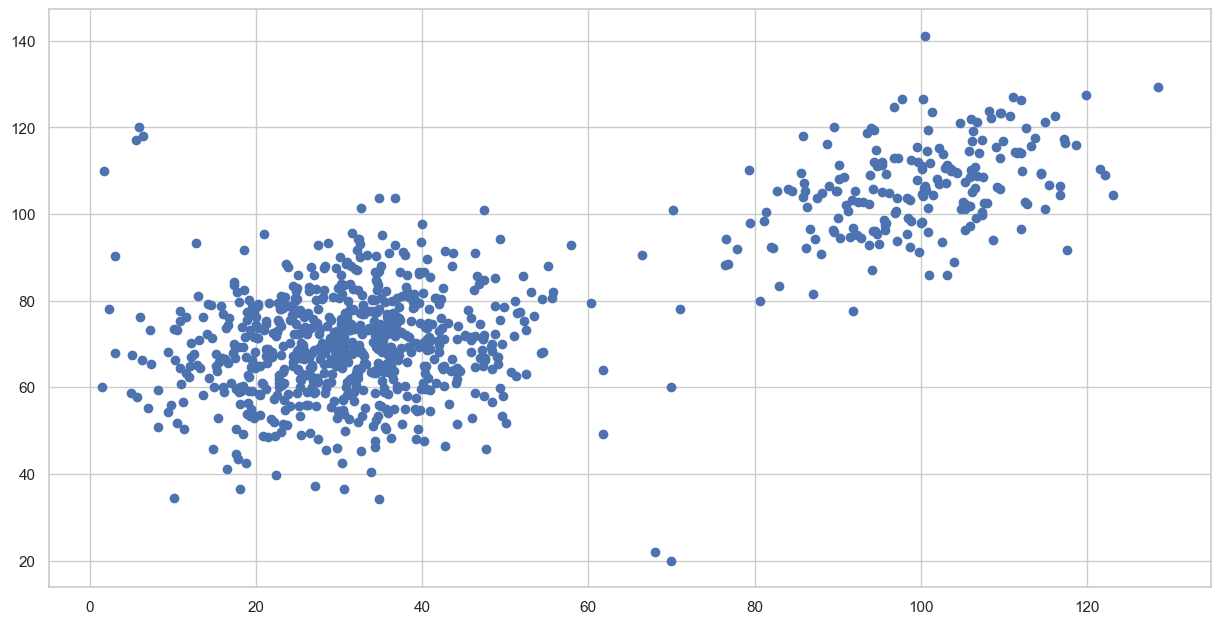

In [9]:
plt.figure(figsize = (15, 7.5))
plt.scatter(df["Mileage"], df["Price"])
plt.show()

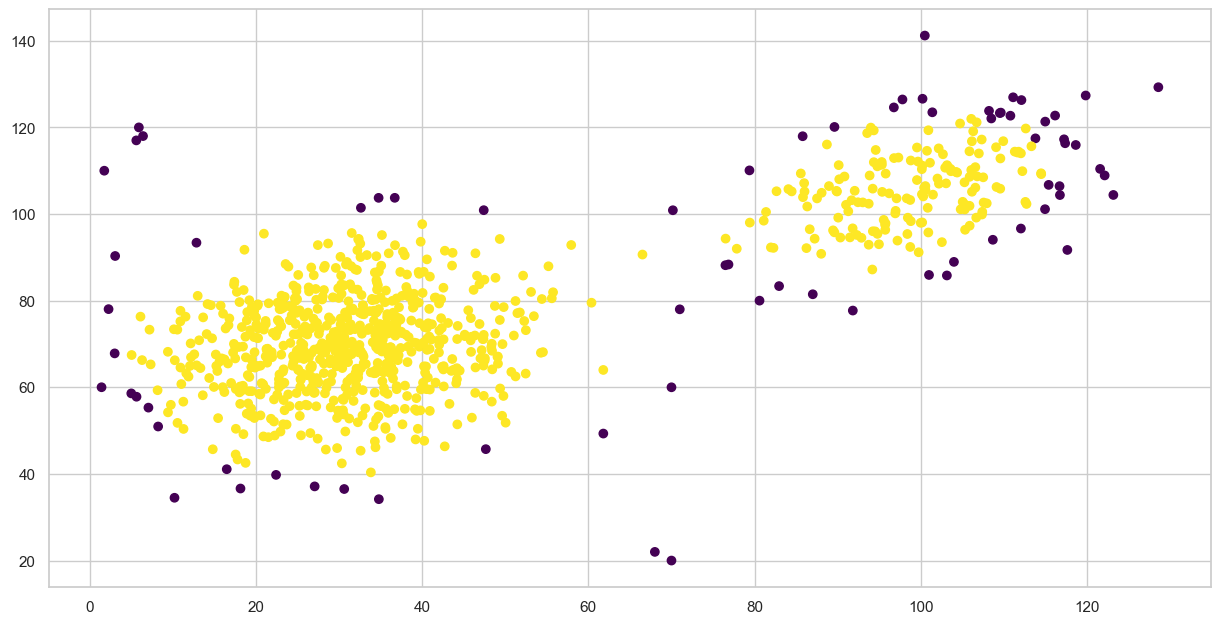

In [10]:
plt.figure(figsize = (15, 7.5))
plt.scatter(df["Mileage"], df["Price"], c = df["outlier"], cmap = "viridis")
plt.show()

# Additional Information on Isolation Forest

### What is the core idea behind isolation forest?
The core idea behind working of isolation forest is that, outliers have lower depth, and inliers have more depth in random trees.

### How is the average depth decided for a point to be classified as an outlier?
There is no one metric specifically used for average depths in isolation forest. At the end, whichever metric is used, it is based on threshold.

### How can isolation forest be evaluated?
- Imagine that, a 100 random trees are built. For each point $x_i$ in the dataset, average depth can be computed.
- Average depth is used to convert into a metric.
- Lesser the average depth, higher is the likelihood that it is an outlier.

### What is the number of data points is large? Wouldn't it mess up the isolation forest?
- Isolation forest can be made on a subset of samples.
- The subset is used as train dataset, and the rest of the data is used as test dataset.

### How is the algorithm biased towards the axis?
While Isolation Forest is a powerful anomaly detection algorithm, it can be biased towards certain axes, particularly when the data distribution is highly skewed along a specific dimension. This bias arises due to the random selection of features and thresholds during tree construction. The bias can occur due to,
1. Feature Selection: If a feature with a high degree of skewness is frequently selected for splitting, the decision trees will tend to be more sensitive to variations along that axis. This can lead to false positives or false negatives, depending on the nature of the outliers.
2. Threshold Selection: The random selection of thresholds can also contribute to the bias. If the threshold is chosen in a way that favors one side of the distribution, the algorithm may be more likely to identify outliers on the other side.

### What is the potential consequence of isolation forest being biased towards the axis? Why is it axis parallel?
The splits in Isolation Forest are axis parallel, and hence, they cannot capture the non-linear/ complex relationships in the data.

# Time and Space Complexity of Isolation Forest

### Time complexity
The time complexity for building a single decision tree is,

$O(n * \log{n})$

Where,
- n = number of data points.

The time complexity for building multiple decision trees is,

$O(m * n * \log{n})$

Where,
- m = number of trees.
- n = number of data points.

### Space complexity
The space complexity of isolation forest is,

$O(m * n)$

Where,
- m = number of trees.
- n = number of data points.

# Local Outlier Factor (LOF)

### Global Outliers v. Local Outliers
LOF helps in defining the outliers beyod a simple "far from the crowd" definition. It differentiates between two types of outliers,
- Global outliers: These are easy to spot outliers that deviate significantly from the main cluster of data points. They are like the lone wolf, far away from the pack.
- Local outliers: These outliers are more subtle. They might reside within a small group of data points (k-nearest neighbors) that appear dense, but the outlier itself is sparse compared to its neighbors. Imagine an intruder in a seemingly normal group.

### LOF
LOF goes beyond just identifying outliers. It calculates a numerical score for each data point, indicating its level of outlierness. This score is the ratio of,
- Local Density (kNN Density): The density of the k-nearest neighbors (kNN) surrounding the data point. A high density suggests the point is in a tightly packed area.
- Point's Own Density: The density of the data point itself. A high density implies the point resides in a region with many similar data points.

Therefore, $LOF = \frac{Local Density}{Point’s own Density}$.

### Interpreting the LOF score
- LOF > 1: This indicates a higher density among the kNN compared to the point itself. It suggests the point might be a local outlier, residing in a dense area but being sparse relative to its neighbors.
- LOF < 1: This signifies a lower density around the kNN compared to the point's own density. This implies the point is likely not an outlier and resides in a region with similar data points.

### Advantages of LOF
Isolation Forest, while effective, can handle both local and global outliers well. LOF provides a valuable tool for situations where understanding the specific type of outlier (local v. global) is crucial for further analysis.

By combining the concepts of local and global outliers with the LOF score, you gain a more nuanced understanding of how data points deviate from the overall pattern. This can be particularly beneficial in tasks like anomaly detection or data cleaning, where pinpointing the exact nature of outliers is essential.

### Disadvantage of LOF
1. LOF relies on the k-nearest neighbors for desity estimation. However, finding the optimun k can be tricky.
2. A clear threshold to define a point as outlier is absent. Therefore, to find this threshold requires conducting a lot of experiments and domain knowledge.
3. LOF's effectiveness can diminish in high-dimensional data.
4. Calculating LOF for all the data points can be computationally expensive especially for large datasets.

# Implementing LOF

In [11]:
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(n_neighbors=20, contamination=0.065).fit_predict(df.iloc[:, :2])
df["is_outlier_LOF"] = model
df.head()

,Mileage,Price,outlier,is_outlier_LOF
0,54.282388,67.967708,1,1
1,17.331911,70.023637,1,1
2,36.548113,68.080455,1,1
3,42.567541,71.058755,1,1
4,5.608853,57.822432,-1,1


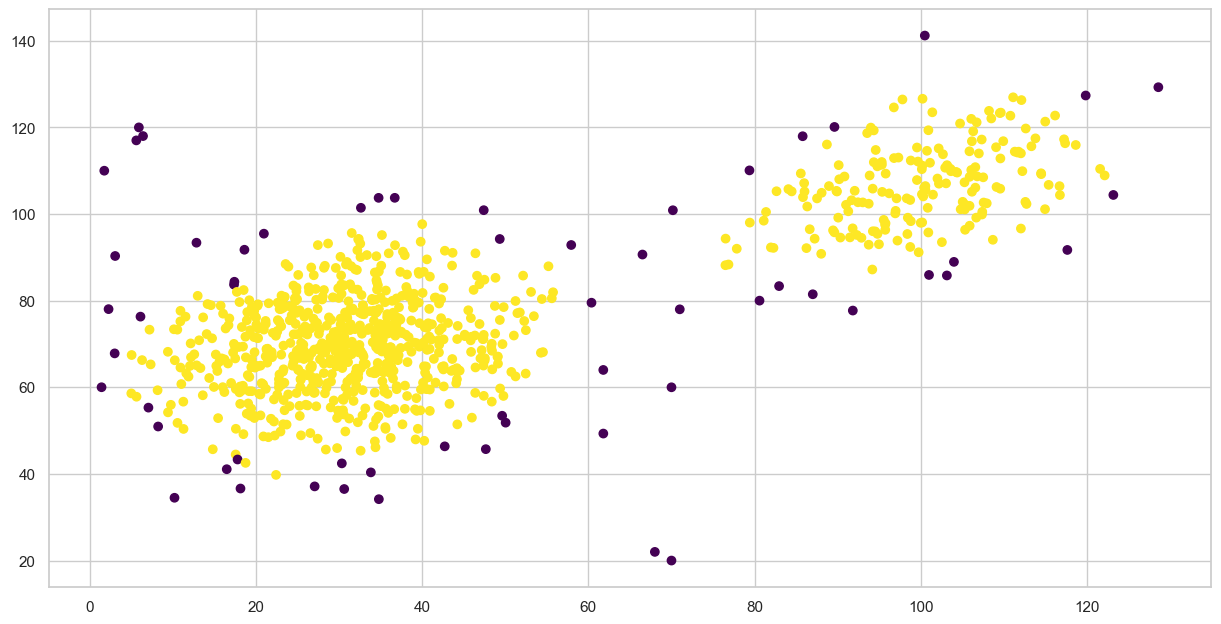

In [12]:
plt.figure(figsize = (15, 7.5))
plt.scatter(df["Mileage"], df["Price"], c = df["is_outlier_LOF"], cmap = "viridis")
plt.show()